<a href="https://colab.research.google.com/github/pharringtonp19/presidential-policies/blob/main/notebooks/tariffs/share_of_tax_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [11]:
start, end = dt.datetime(1945, 4, 12), dt.datetime(2025, 4, 1)
tax_receipts = web.DataReader("W006RC1Q027SBEA", "fred", start, end)
tax_receipts.head()

,W006RC1Q027SBEA
DATE,
1947-01-01,36.860
1947-04-01,36.316
1947-07-01,36.264
1947-10-01,38.744
1948-01-01,38.952


In [15]:
start, end = dt.datetime(1945, 4, 12), dt.datetime(2025, 4, 1)
duties = web.DataReader("B235RC1Q027SBEA", "fred", start, end)
df = pd.merge(tax_receipts, duties, left_index=True, right_index=True, how='inner')
df = df.dropna()
df['Frac_duties'] = df['B235RC1Q027SBEA'] / df['W006RC1Q027SBEA'] *100
df.head()

,W006RC1Q027SBEA,B235RC1Q027SBEA,Frac_duties
DATE,,,
1959-01-01,70.632,0.952,1.347831
1959-04-01,74.056,1.076,1.452955
1959-07-01,72.152,1.092,1.513472
1959-10-01,72.496,1.076,1.484220
1960-01-01,77.184,1.176,1.523632


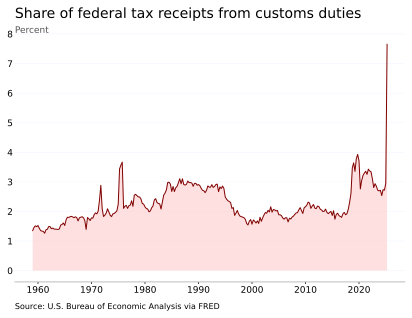

In [21]:
x, y = df.index, df['Frac_duties']

# --- NYT-style colors ---
line_color     = "#800000"  # deep maroon (main line)
fill_color     = "#ffcccc"  # very light red/pink fill
forecast_fill  = "#ff9999"  # light red shading for forecast
grid_color     = "#f0f4ff"  # almost white with a blue tint for grid

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)

# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.06, s='Share of federal tax receipts from customs duties', transform=ax.transAxes, size=14)
ax.text(0, 1.00, "Percent", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("Source: U.S. Bureau of Economic Analysis via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)


fig.savefig("Share_of_federal_tax_receipts_from_customs_duties.png", bbox_inches="tight", dpi=300)
plt.show()